In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df = df[["v1", "v2"]]
df.columns = ["label", "message"]

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df["label"] = df["label"].map({
    "ham": 0,
    "spam": 1
})

In [4]:
df["label"].value_counts()

X = df["message"]
y = df["label"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_df=0.95,
    min_df=2
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


MODEL 1 — NAIVE BAYES

In [7]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [8]:
nb_preds = nb_model.predict(X_test_vec)

nb_accuracy = accuracy_score(y_test, nb_preds)
nb_accuracy

0.9757847533632287

MODEL 2 — LOGISTIC REGRESSION

In [9]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [10]:
lr_preds = lr_model.predict(X_test_vec)

lr_accuracy = accuracy_score(y_test, lr_preds)
lr_accuracy

0.9730941704035875

Accuracy Comparison (Bar Chart)

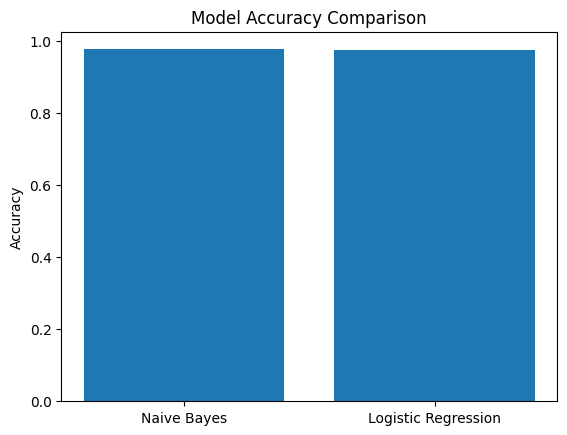

In [11]:
models = ["Naive Bayes", "Logistic Regression"]
accuracies = [nb_accuracy, lr_accuracy]

plt.figure()
plt.bar(models, accuracies)
plt.ylabel("Accuracy")      
plt.title("Model Accuracy Comparison")
plt.show()

Confusion Matrix (Naive Bayes)

In [12]:
confusion_matrix(y_test, nb_preds)

array([[965,   1],
       [ 26, 123]])

Confusion Matrix (Logistic Regression)

In [13]:
confusion_matrix(y_test, lr_preds)

array([[966,   0],
       [ 30, 119]])

Actual vs Predicted (Gradient Boosting)

In [14]:
print("Naive Bayes Report:\n")
print(classification_report(y_test, nb_preds))

print("\nLogistic Regression Report:\n")
print(classification_report(y_test, lr_preds))

Naive Bayes Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115


Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.80      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



Precision & Recall Comparison Plot

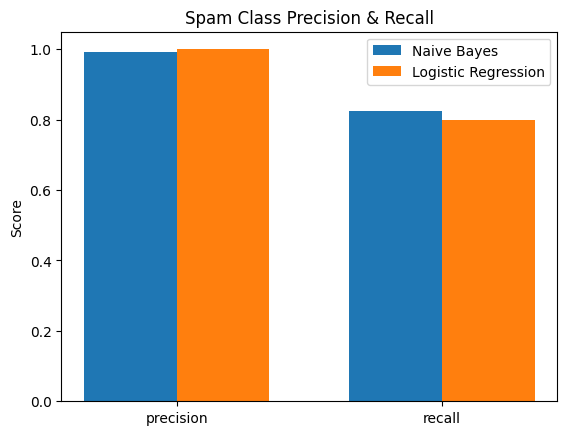

In [15]:
nb_report = classification_report(y_test, nb_preds, output_dict=True)
lr_report = classification_report(y_test, lr_preds, output_dict=True)

metrics = ["precision", "recall"]
nb_scores = [nb_report["1"][m] for m in metrics]
lr_scores = [lr_report["1"][m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.figure()
plt.bar(x - width/2, nb_scores, width, label="Naive Bayes")
plt.bar(x + width/2, lr_scores, width, label="Logistic Regression")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Spam Class Precision & Recall")
plt.legend()
plt.show()

Testing Custom Message

In [16]:
message = ["Win cash prize now! Click the link"]
vec = vectorizer.transform(message)

nb_result = nb_model.predict(vec)[0]
lr_result = lr_model.predict(vec)[0]

print("Naive Bayes:", "Spam" if nb_result else "Not Spam")
print("Logistic Regression:", "Spam" if lr_result else "Not Spam")


Naive Bayes: Spam
Logistic Regression: Spam
